# **FGV EESP**

- ## Análise de Dados Econômicos - Brasil
---



## **Bibliotecas**

In [ ]:
# Estatística descritiva
install.packages("stargazer")

# Painéis com gráficos
install.packages("gridExtra")

In [ ]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(httr)
library(lubridate)
library(readxl)
library(stargazer)
library(tidyverse)
library(zoo)

## **Dados**

In [ ]:
# Caminho do arquivo original
file_path <- "https://github.com/matheusrmorgado/inflation-expectation/raw/main/data/public_data.xlsx"

# Download do arquivo
download.file(file_path, "public_data.xlsx")

# Ler o arquivo Excel e converter em dataframe
df_public_data <- as.data.frame(read_excel("public_data.xlsx"))

# Converter year e month_name
df_public_data <- df_public_data %>%
  mutate(year = as.numeric(year),  # Converter year para numérico
         month_name = factor(month_name, levels = month.abb, ordered = TRUE))  # Converter month_name para um fator ordenado

# Converter month_date
df_public_data$month_date <- ymd(df_public_data$month_date)  # Converter month_date para formato Date

# Lista de variáveis para transformar em séries temporais
vars_to_convert <- c("month", "market_inflation_expectation", "consumer_inflation_expectation", "consumer_confidence_index", "inflation_target", "inflation_target_lower_bound", "inflation_target_upper_bound", "inflation_target_wtd_avg", "inflation_target_lower_bound_wtd_avg", "inflation_target_upper_bound_wtd_avg", "ipca", "selic", "selic_deflated", "real_household_income", "real_household_income_trend", "real_household_income_gap", "real_exchange_rate", "real_exchange_rate_trend", "real_exchange_rate_gap", "gdp", "primary_fiscal_result", "primary_fiscal_result_to_gdp", "ipca_lag", "selic_deflated_lag", "primary_fiscal_result_to_gdp_lag", "real_exchange_rate_gap_lag", "real_household_income_gap_lag", "consumer_confidence_index_lag")

# Loop para transformar as variáveis em séries temporais
for (var in vars_to_convert) {
  df_public_data[[var]] <- ts(df_public_data[[var]], start = c(2006, 1), frequency = 12)
}

In [ ]:
head(df_public_data, 5)

,year,month_name,month_date,month,market_inflation_expectation,consumer_inflation_expectation,consumer_confidence_index,inflation_target,inflation_target_lower_bound,inflation_target_upper_bound,⋯,real_exchange_rate_gap,gdp,primary_fiscal_result,primary_fiscal_result_to_gdp,ipca_lag,selic_deflated_lag,primary_fiscal_result_to_gdp_lag,real_exchange_rate_gap_lag,real_household_income_gap_lag,consumer_confidence_index_lag
,<dbl>,<ord>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2006,Jan,2006-01-01,2006.000,4.58,6.9,93.3,4.5,2.5,6.5,⋯,2.311963,2190643,1022618,0.4668,5.69,11.87435,0.4654,2.145933,2.0099366,88.7
2,2006,Feb,2006-02-01,2006.083,4.49,7.0,92.8,4.5,2.5,6.5,⋯,-2.641655,2207671,1023884,0.4638,5.70,11.30558,0.4668,2.311963,1.8753112,93.3
3,2006,Mar,2006-03-01,2006.167,4.36,6.9,93.0,4.5,2.5,6.5,⋯,-2.421135,2225145,1032060,0.4638,5.51,11.15534,0.4638,-2.641655,1.3150849,92.8
4,2006,Apr,2006-04-01,2006.250,4.16,6.5,91.8,4.5,2.5,6.5,⋯,-2.198977,2235813,1019291,0.4559,5.32,10.84314,0.4638,-2.421135,0.8411086,93.0
5,2006,May,2006-05-01,2006.333,4.18,6.7,90.7,4.5,2.5,6.5,⋯,2.482859,2256419,1042621,0.4621,4.63,11.04846,0.4559,-2.198977,0.5015829,91.8


## **Estatísticas Descritivas**

In [ ]:
stargazer(df_public_data, digits = 2, type = "text")


Statistic                             N      Mean       St. Dev.       Min           Max     
---------------------------------------------------------------------------------------------
year                                 212   2,014.34       5.11        2,006         2,023    
month                                212   2,014.79       5.11       2,006.00     2,023.58   
market_inflation_expectation         212     4.84         0.93         2.96         7.01     
consumer_inflation_expectation       212     6.95         1.65         4.30         11.40    
consumer_confidence_index            212    90.40        11.99        58.20        113.20    
inflation_target                     212     4.31         0.36         3.25         4.50     
inflation_target_lower_bound         212     2.50         0.27         1.75         3.00     
inflation_target_upper_bound         212     6.12         0.55         4.75         6.50     
inflation_target_wtd_avg             212     4.27         0

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


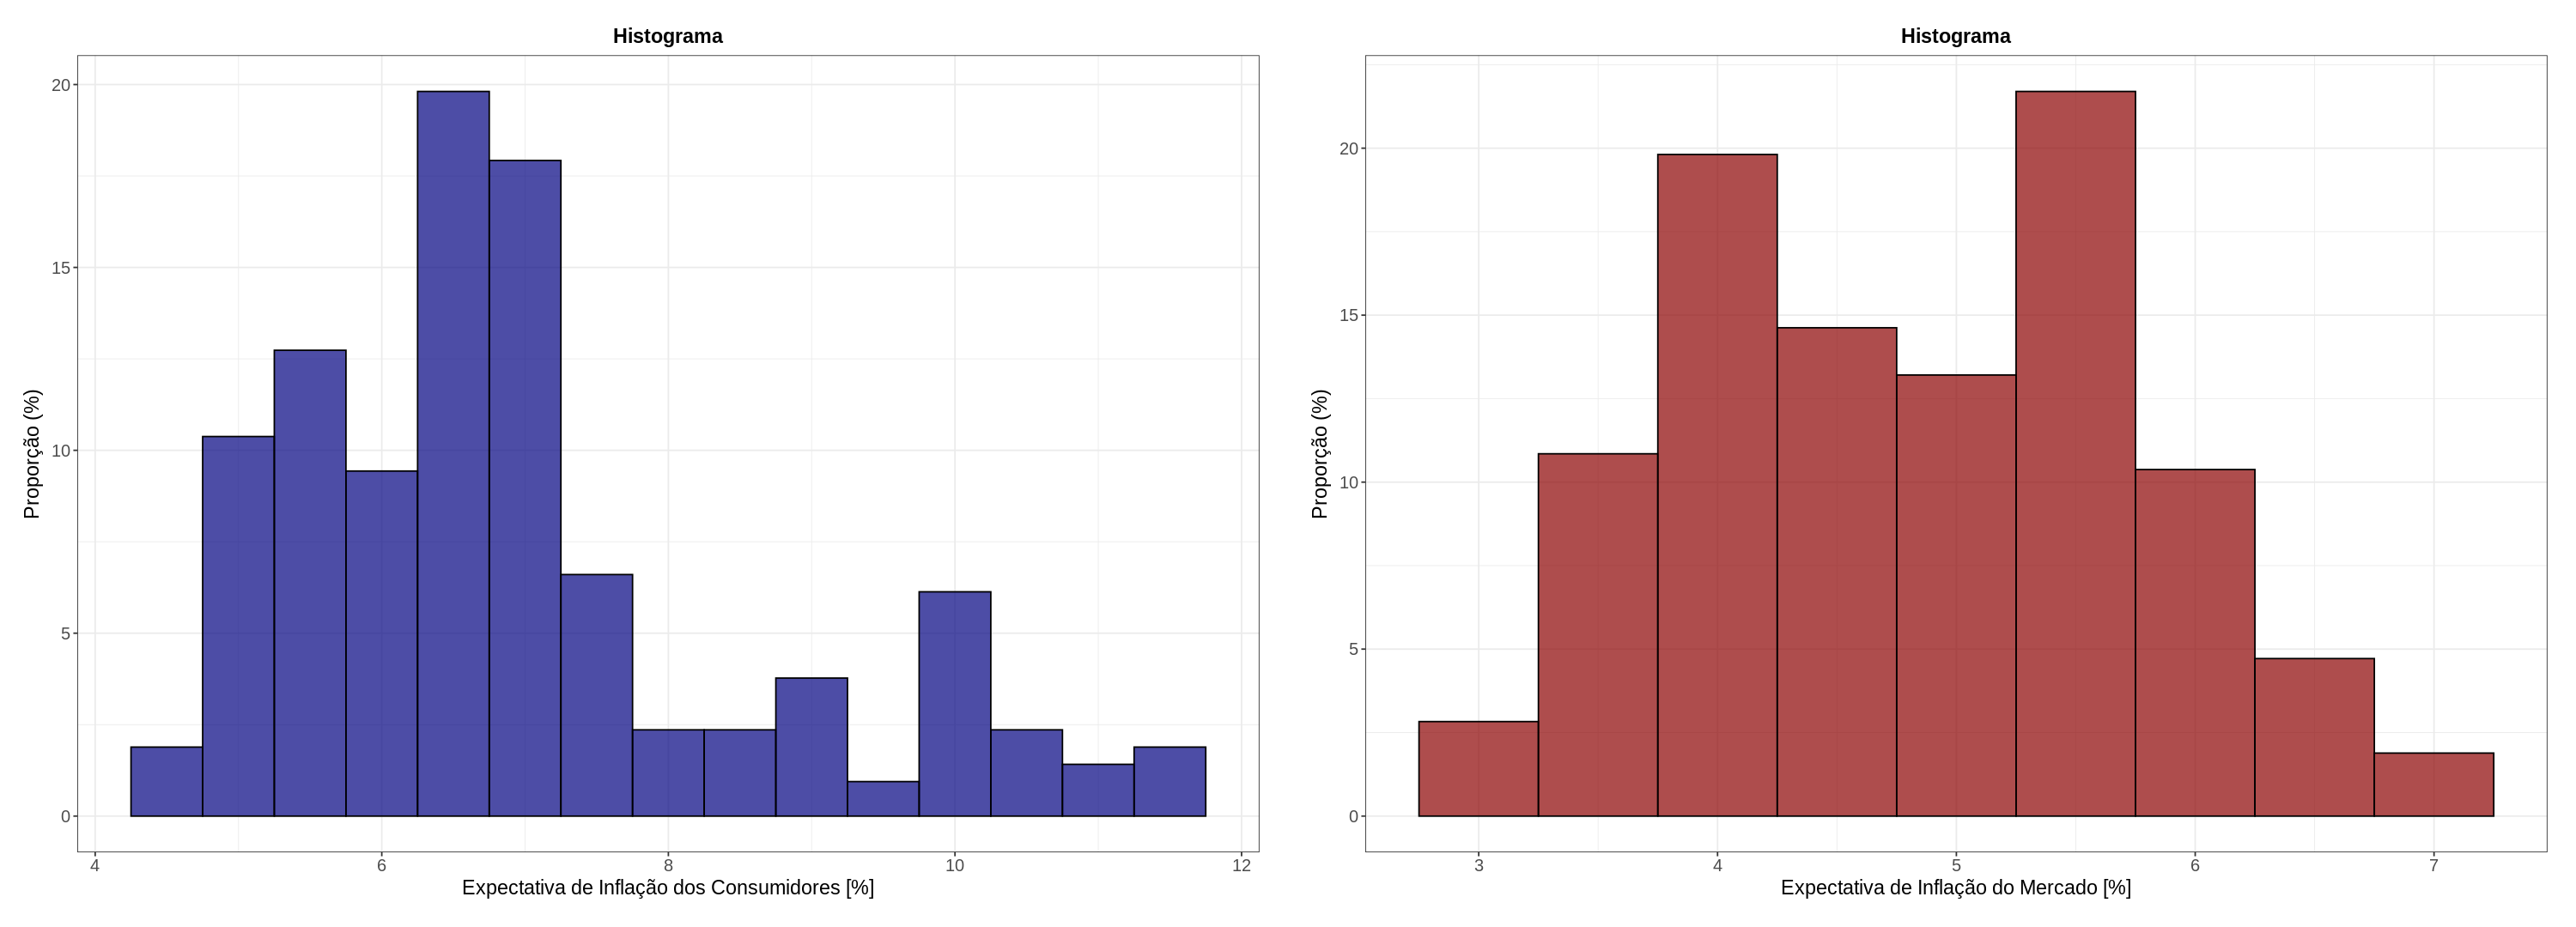

In [ ]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 25, repr.plot.height = 9)

# Gráfico 1: Histograma da Expectativa de Inflação dos Consumidores
plot1 <- ggplot(df_public_data, aes(x = consumer_inflation_expectation, y = 100 * after_stat(count) / sum(after_stat(count)))) +
  geom_histogram(binwidth = 0.5, color = "black", fill = "navy", alpha = 0.7) +
  labs(x = "Expectativa de Inflação dos Consumidores [%]", y = "Proporção (%)", title = "Histograma") +
  theme_bw() +
  theme(
    plot.title = element_text(size = 14, face = "bold", hjust = 0.5),  # Ajuste o tamanho do título
    axis.text = element_text(size = 12),  # Ajuste o tamanho do texto do eixo
    axis.title.y = element_text(size = 14, vjust = 2),
    axis.title.x = element_text(size = 14),
    plot.caption = element_text(size = 10),  # Ajuste o tamanho da legenda
    plot.margin = margin(20, 20, 20, 20)
  )

# Gráfico 2: Histograma da Expectativa de Inflação do Mercado
plot2 <- ggplot(df_public_data, aes(x = market_inflation_expectation, y = 100 * after_stat(count) / sum(after_stat(count)))) +
  geom_histogram(binwidth = 0.5, color = "black", fill = "darkred", alpha = 0.7) +
  labs(x = "Expectativa de Inflação do Mercado [%]", y = "Proporção (%)", title = "Histograma") +
  theme_bw() +
  theme(
    plot.title = element_text(size = 14, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 14, vjust = 2),
    axis.title.x = element_text(size = 14),
    plot.caption = element_text(size = 10),
    plot.margin = margin(20, 20, 20, 20)
  )

# Criar o painel com os gráficos lado a lado
grid.arrange(plot1, plot2, ncol = 2)

## **Séries Temporais**

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


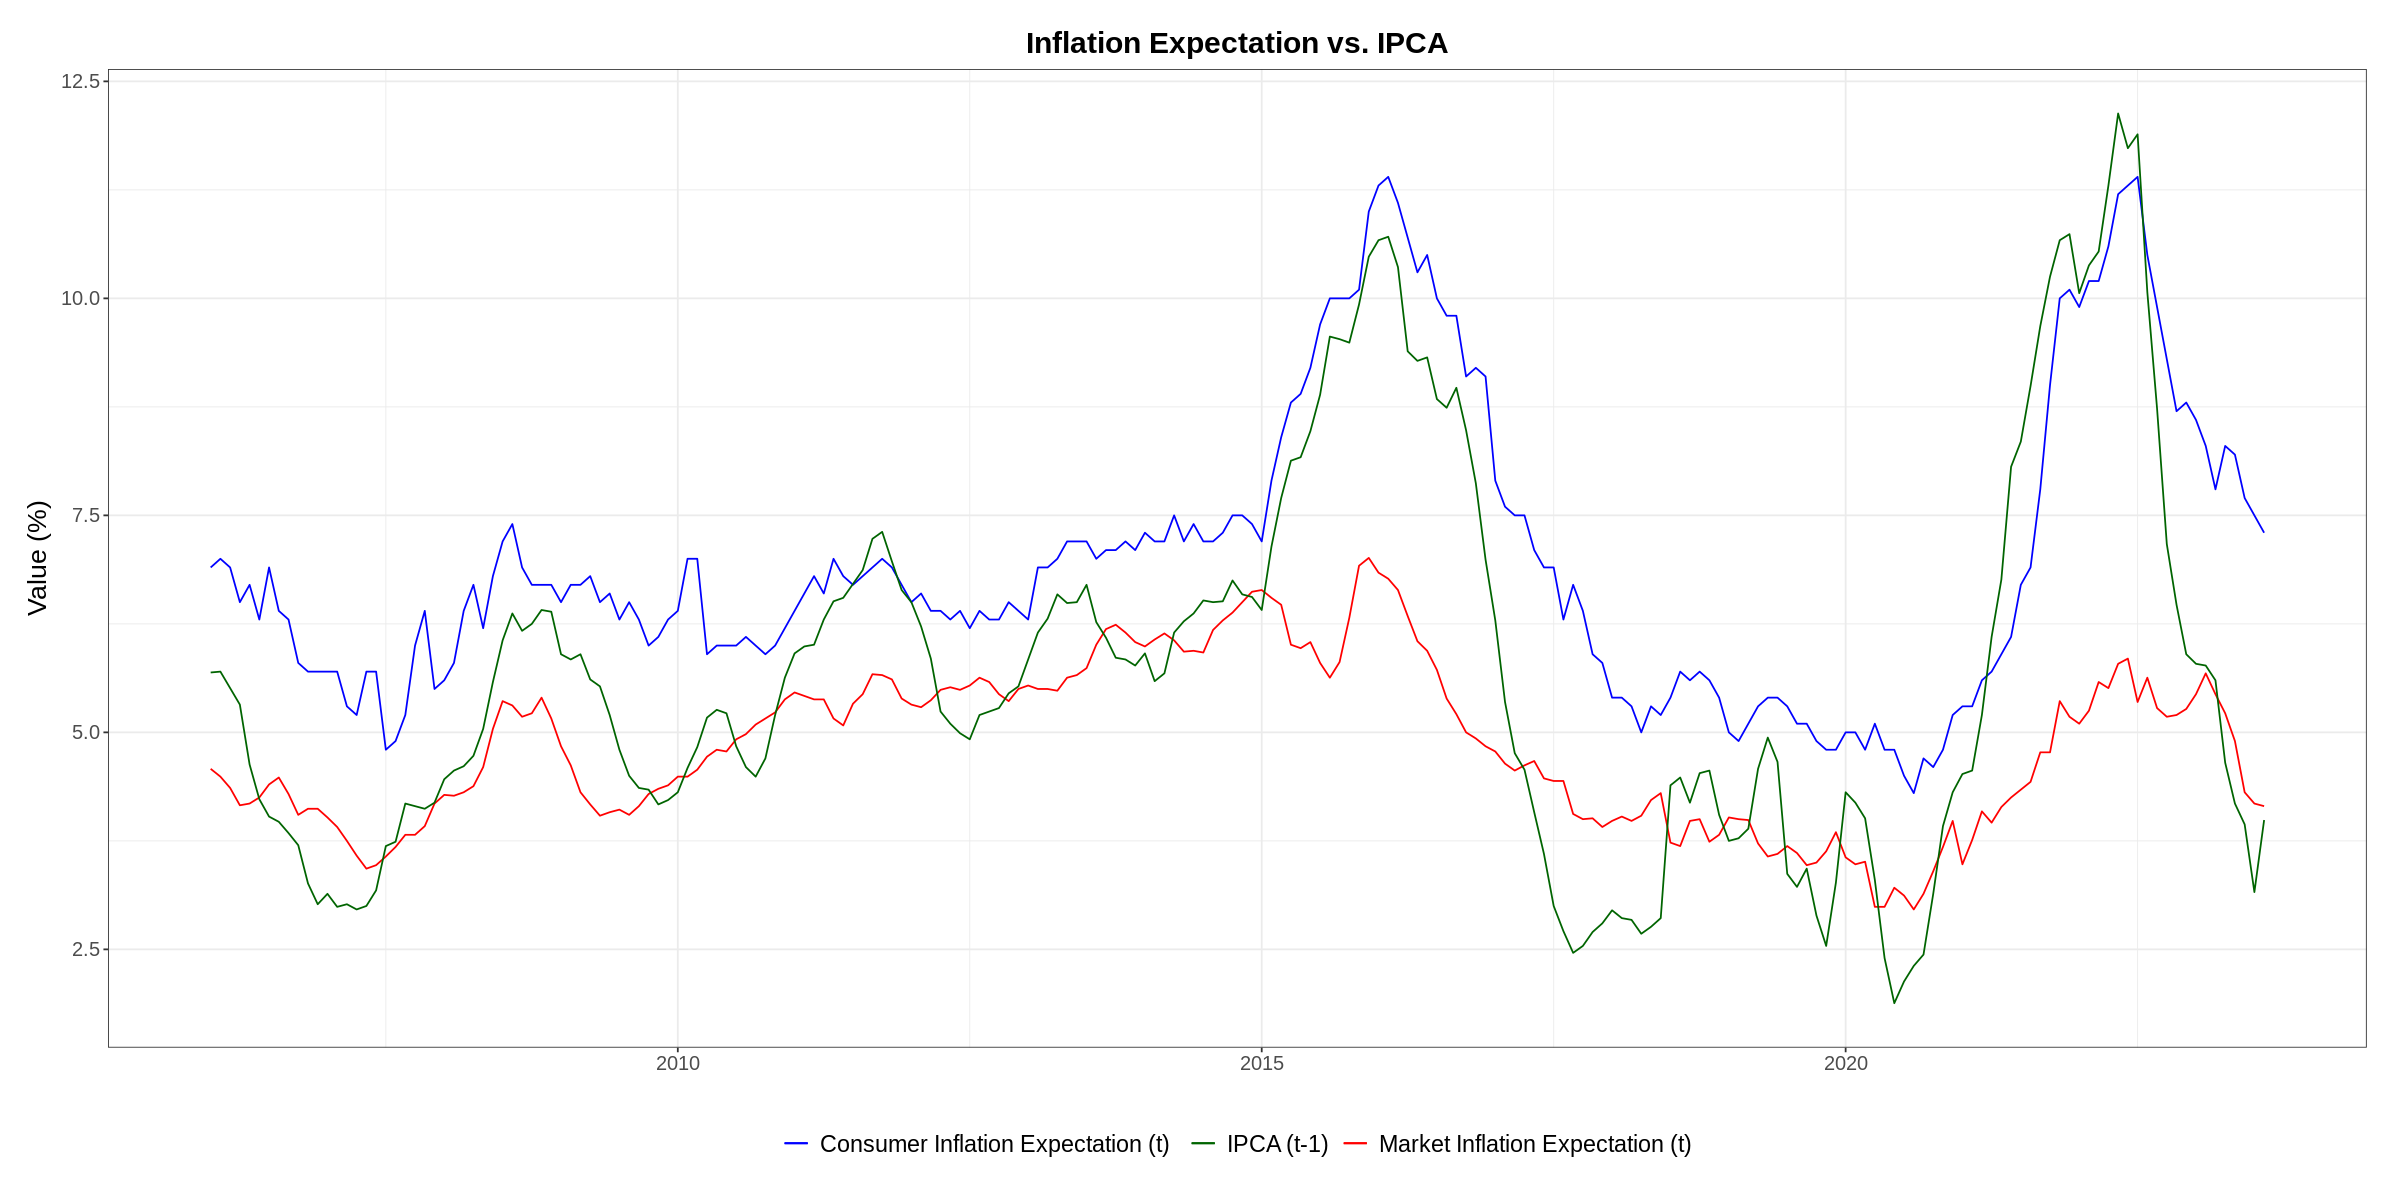

In [ ]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Plotar as séries temporais de "consumer_inflation_expectation" e "market_inflation_expectation"
ggplot(df_public_data) +
  geom_line(aes(x = month, y = consumer_inflation_expectation, color = "Consumer Inflation Expectation (t)")) +
  geom_line(aes(x = month, y = market_inflation_expectation, color = "Market Inflation Expectation (t)")) +
  geom_line(aes(x = month, y = ipca_lag, color = "IPCA (t-1)")) +
  labs(x = "", y = "Value (%)", title = "Inflation Expectation vs. IPCA") +
  scale_color_manual(values = c("blue", "darkgreen", "red"), name = "") +
  theme_bw() +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 14),
    legend.title = element_blank(),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 16, vjust = 2),
    axis.title.x = element_text(size = 14),
    plot.caption = element_text(size = 10),
    plot.margin = margin(20, 20, 20, 20)
  )

- ### **Variáveis Macroeconômicas**

> #### **IPCA**

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


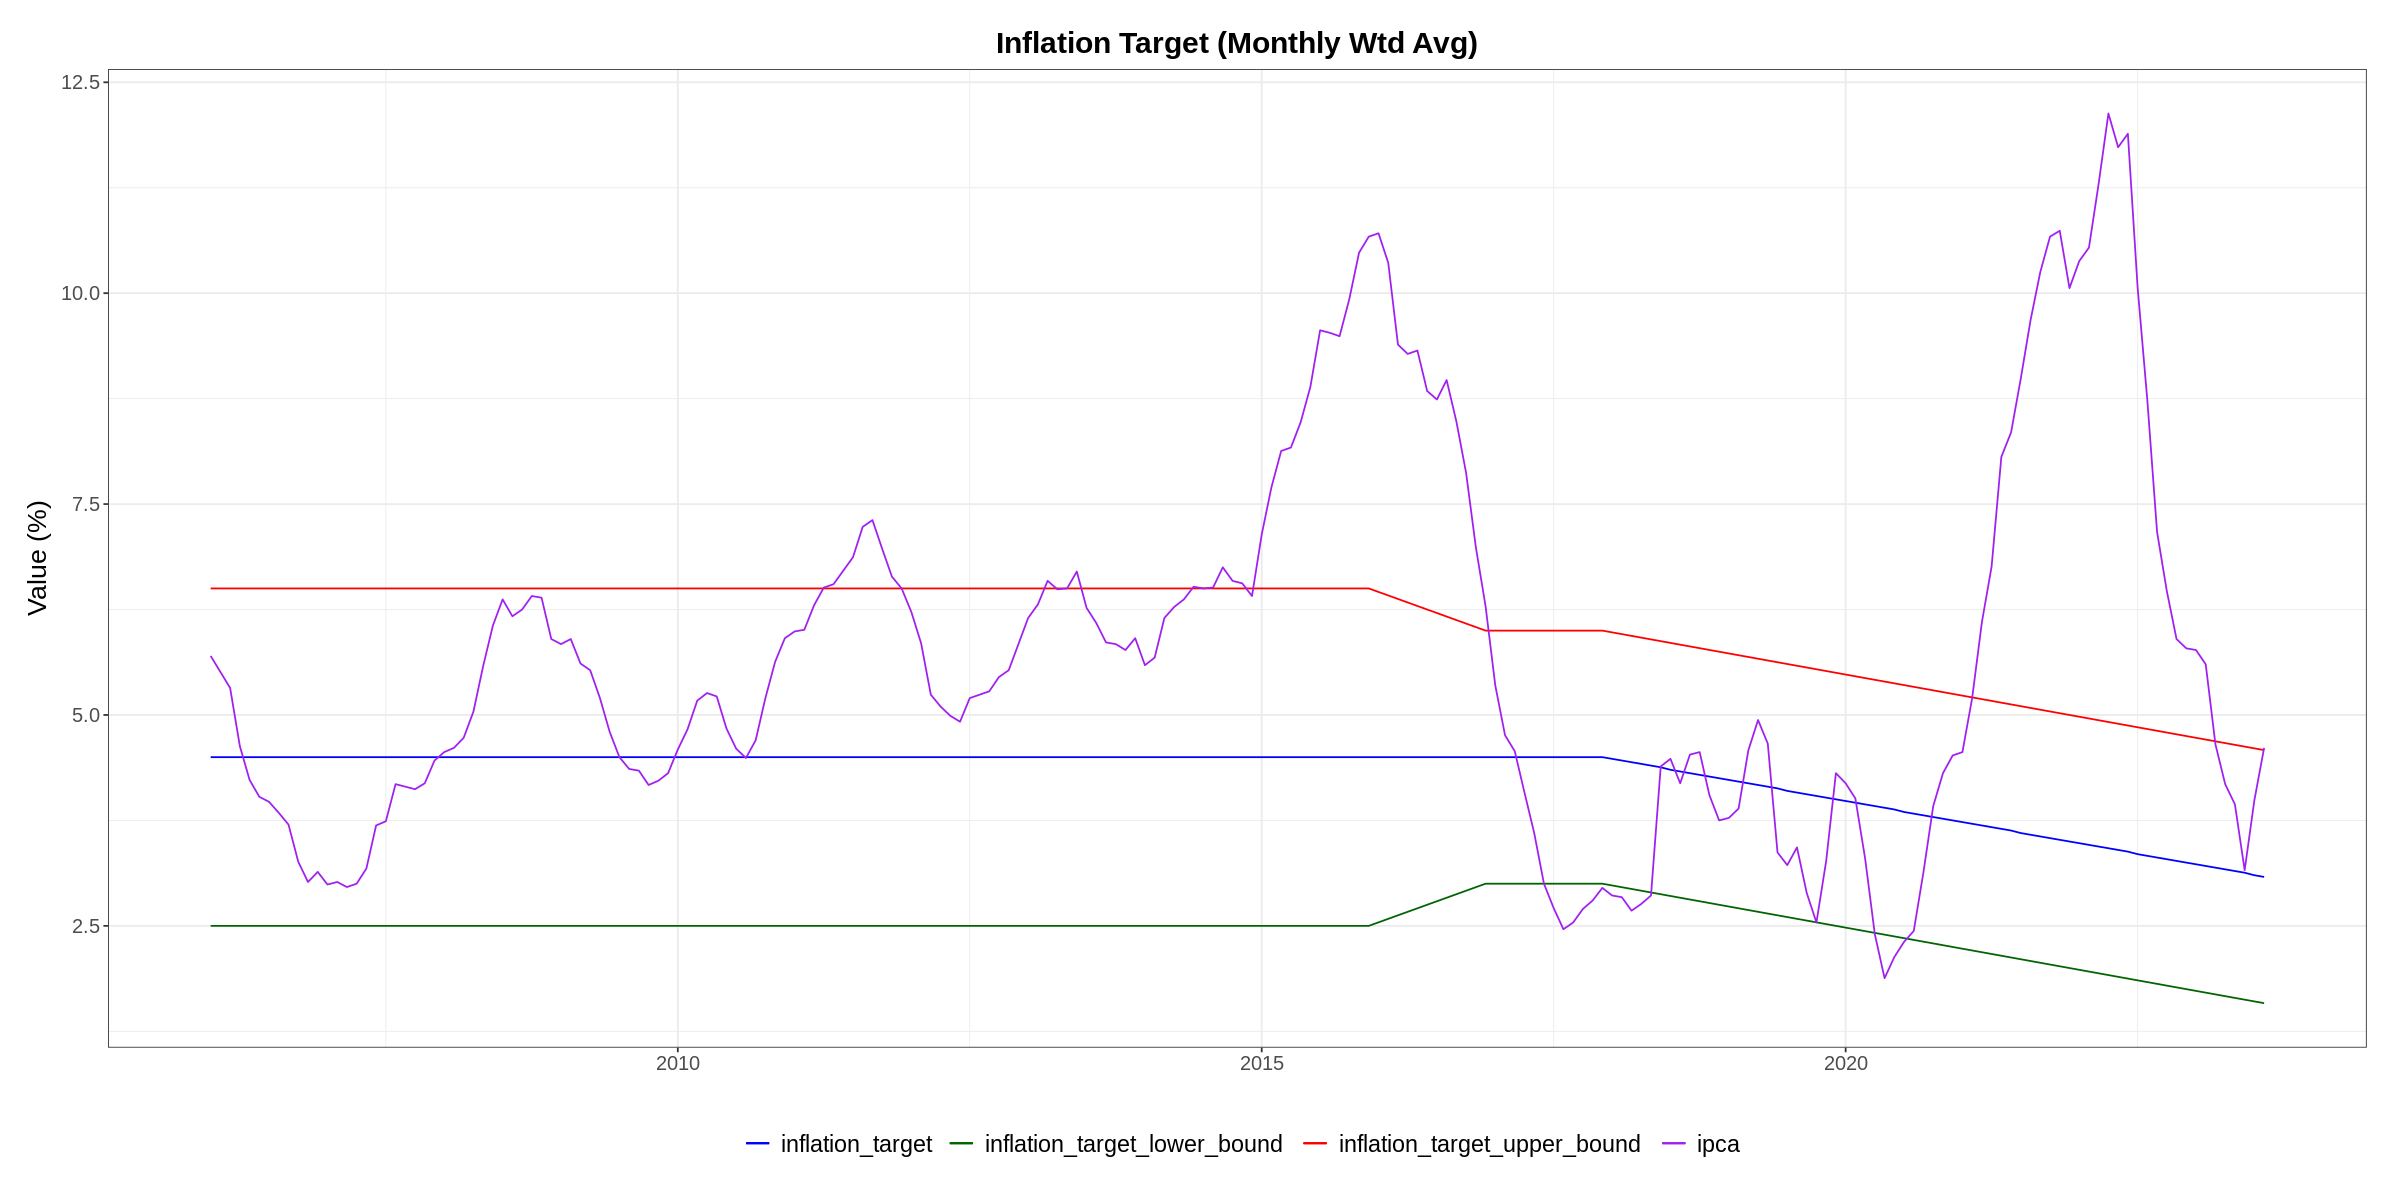

In [ ]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Plotar as séries temporais
ggplot(df_public_data) +
  geom_line(aes(x = month, y = inflation_target_wtd_avg, color = "inflation_target")) +
  geom_line(aes(x = month, y = inflation_target_lower_bound_wtd_avg, color = "inflation_target_lower_bound")) +
  geom_line(aes(x = month, y = inflation_target_upper_bound_wtd_avg, color = "inflation_target_upper_bound")) +
  geom_line(aes(x = month, y = ipca, color = "ipca")) +
  labs(x = "", y = "Value (%)", title = "Inflation Target (Monthly Wtd Avg)") +
  scale_color_manual(values = c("blue", "darkgreen", "red", "purple"), name = "") +
  theme_bw() +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 14),
    legend.title = element_blank(),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 16, vjust = 2),
    axis.title.x = element_text(size = 14),
    plot.caption = element_text(size = 10),
    plot.margin = margin(20, 20, 20, 20)
  )

> #### **Selic**

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


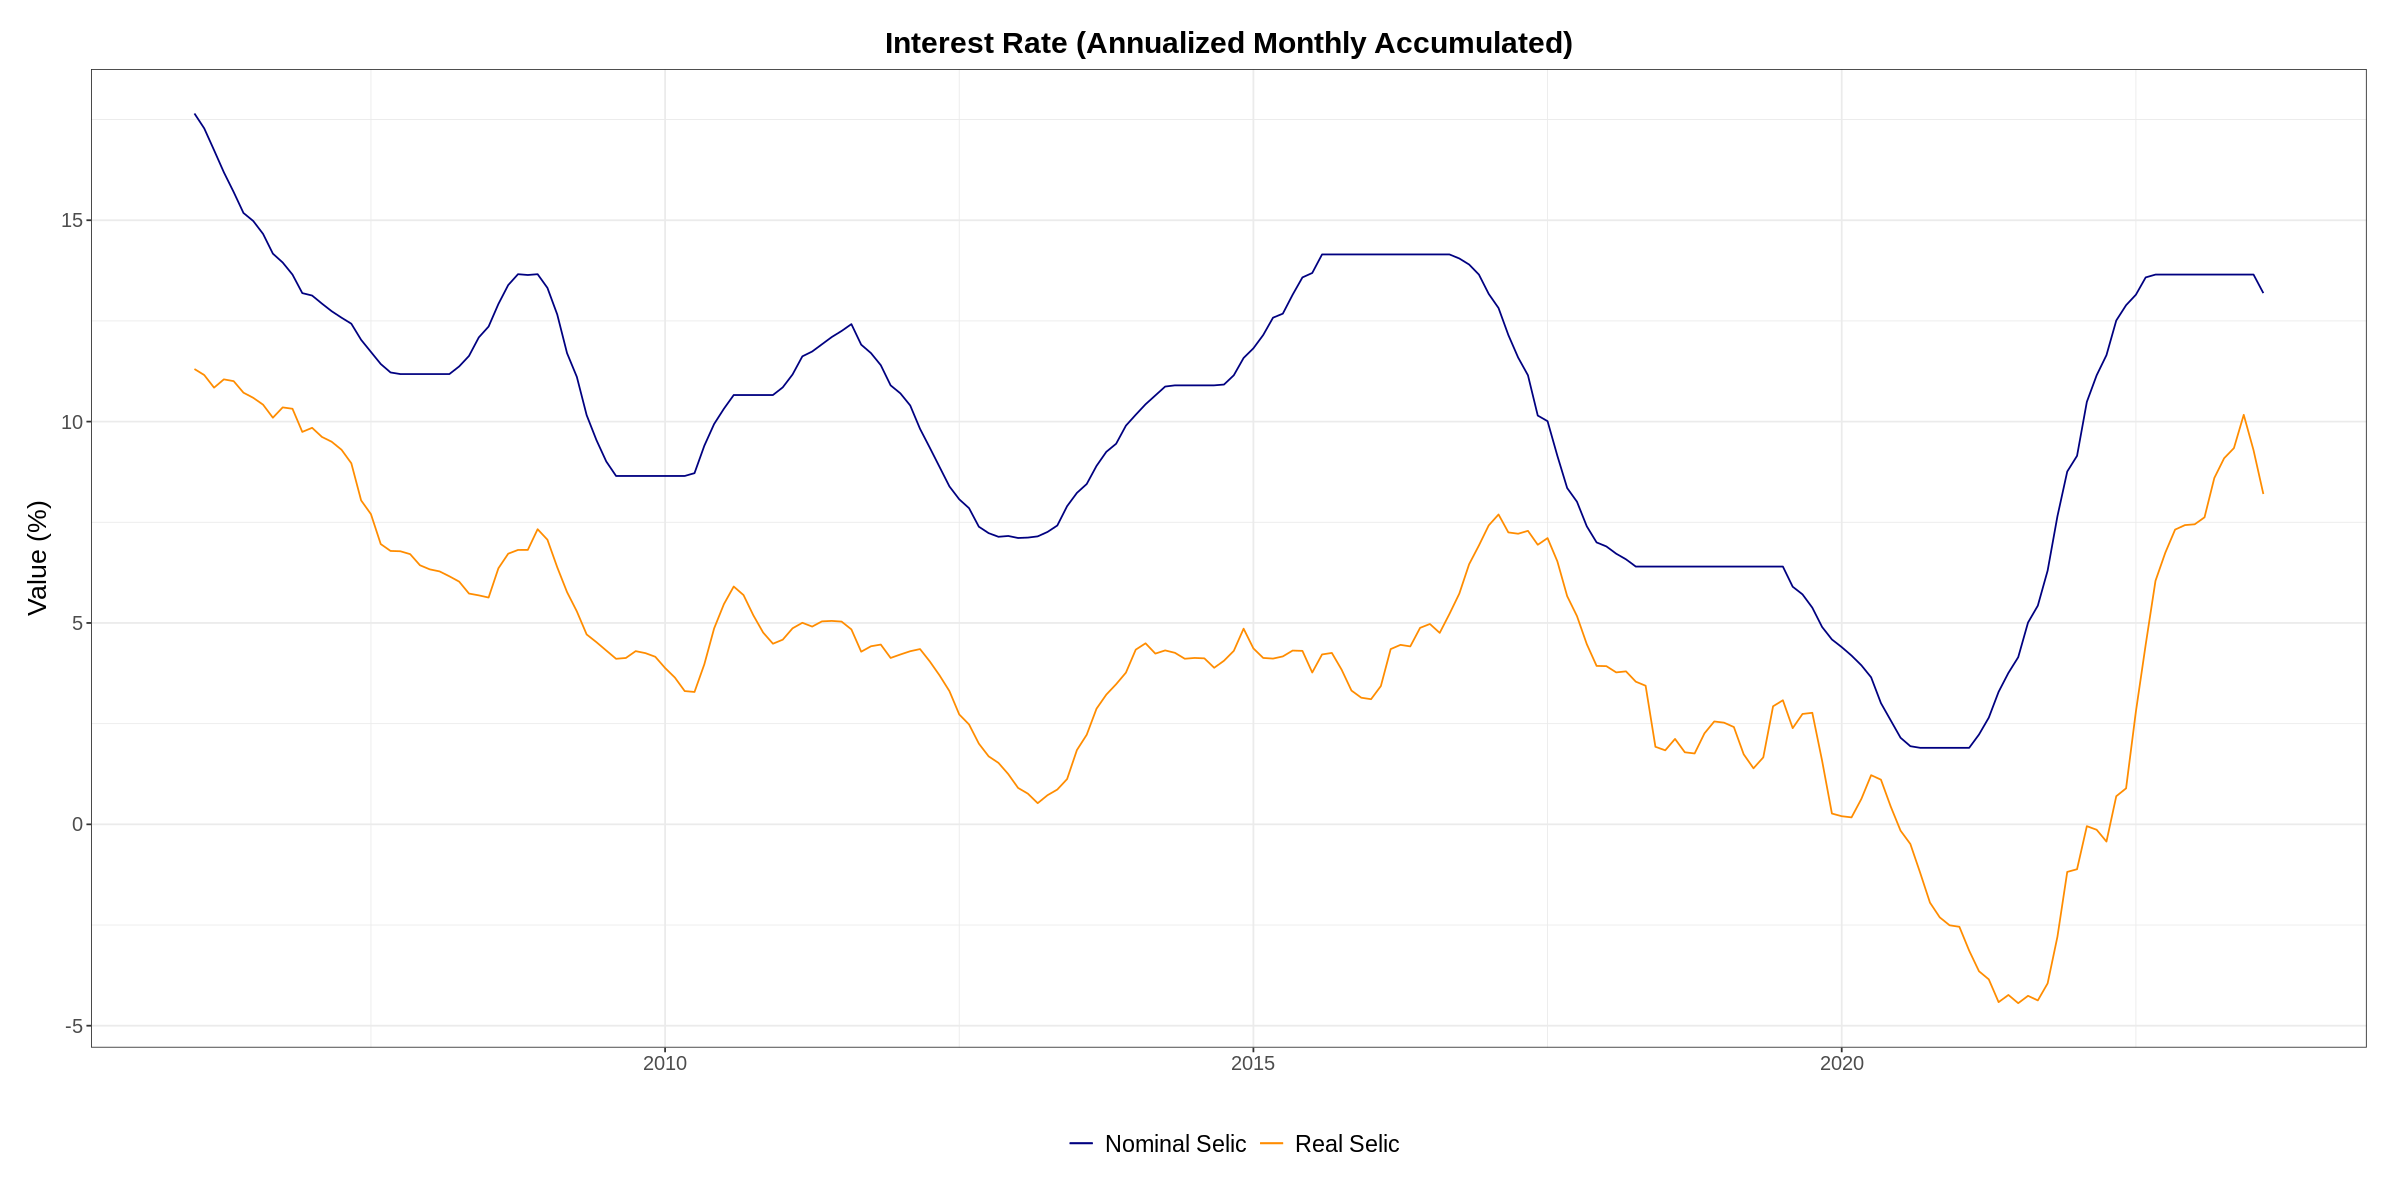

In [ ]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Plotar as séries temporais
ggplot(df_public_data) +
  geom_line(aes(x = month, y = selic, color = "Nominal Selic")) +
  geom_line(aes(x = month, y = selic_deflated, color = "Real Selic")) +
  labs(x = "", y = "Value (%)", title = "Interest Rate (Annualized Monthly Accumulated)") +
  scale_color_manual(values = c("navy", "darkorange"), name = "") +
  theme_bw() +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 14),
    legend.title = element_blank(),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 16, vjust = 2),
    axis.title.x = element_text(size = 14),
    plot.caption = element_text(size = 10),
    plot.margin = margin(20, 20, 20, 20)
  )

> #### **Renda**

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


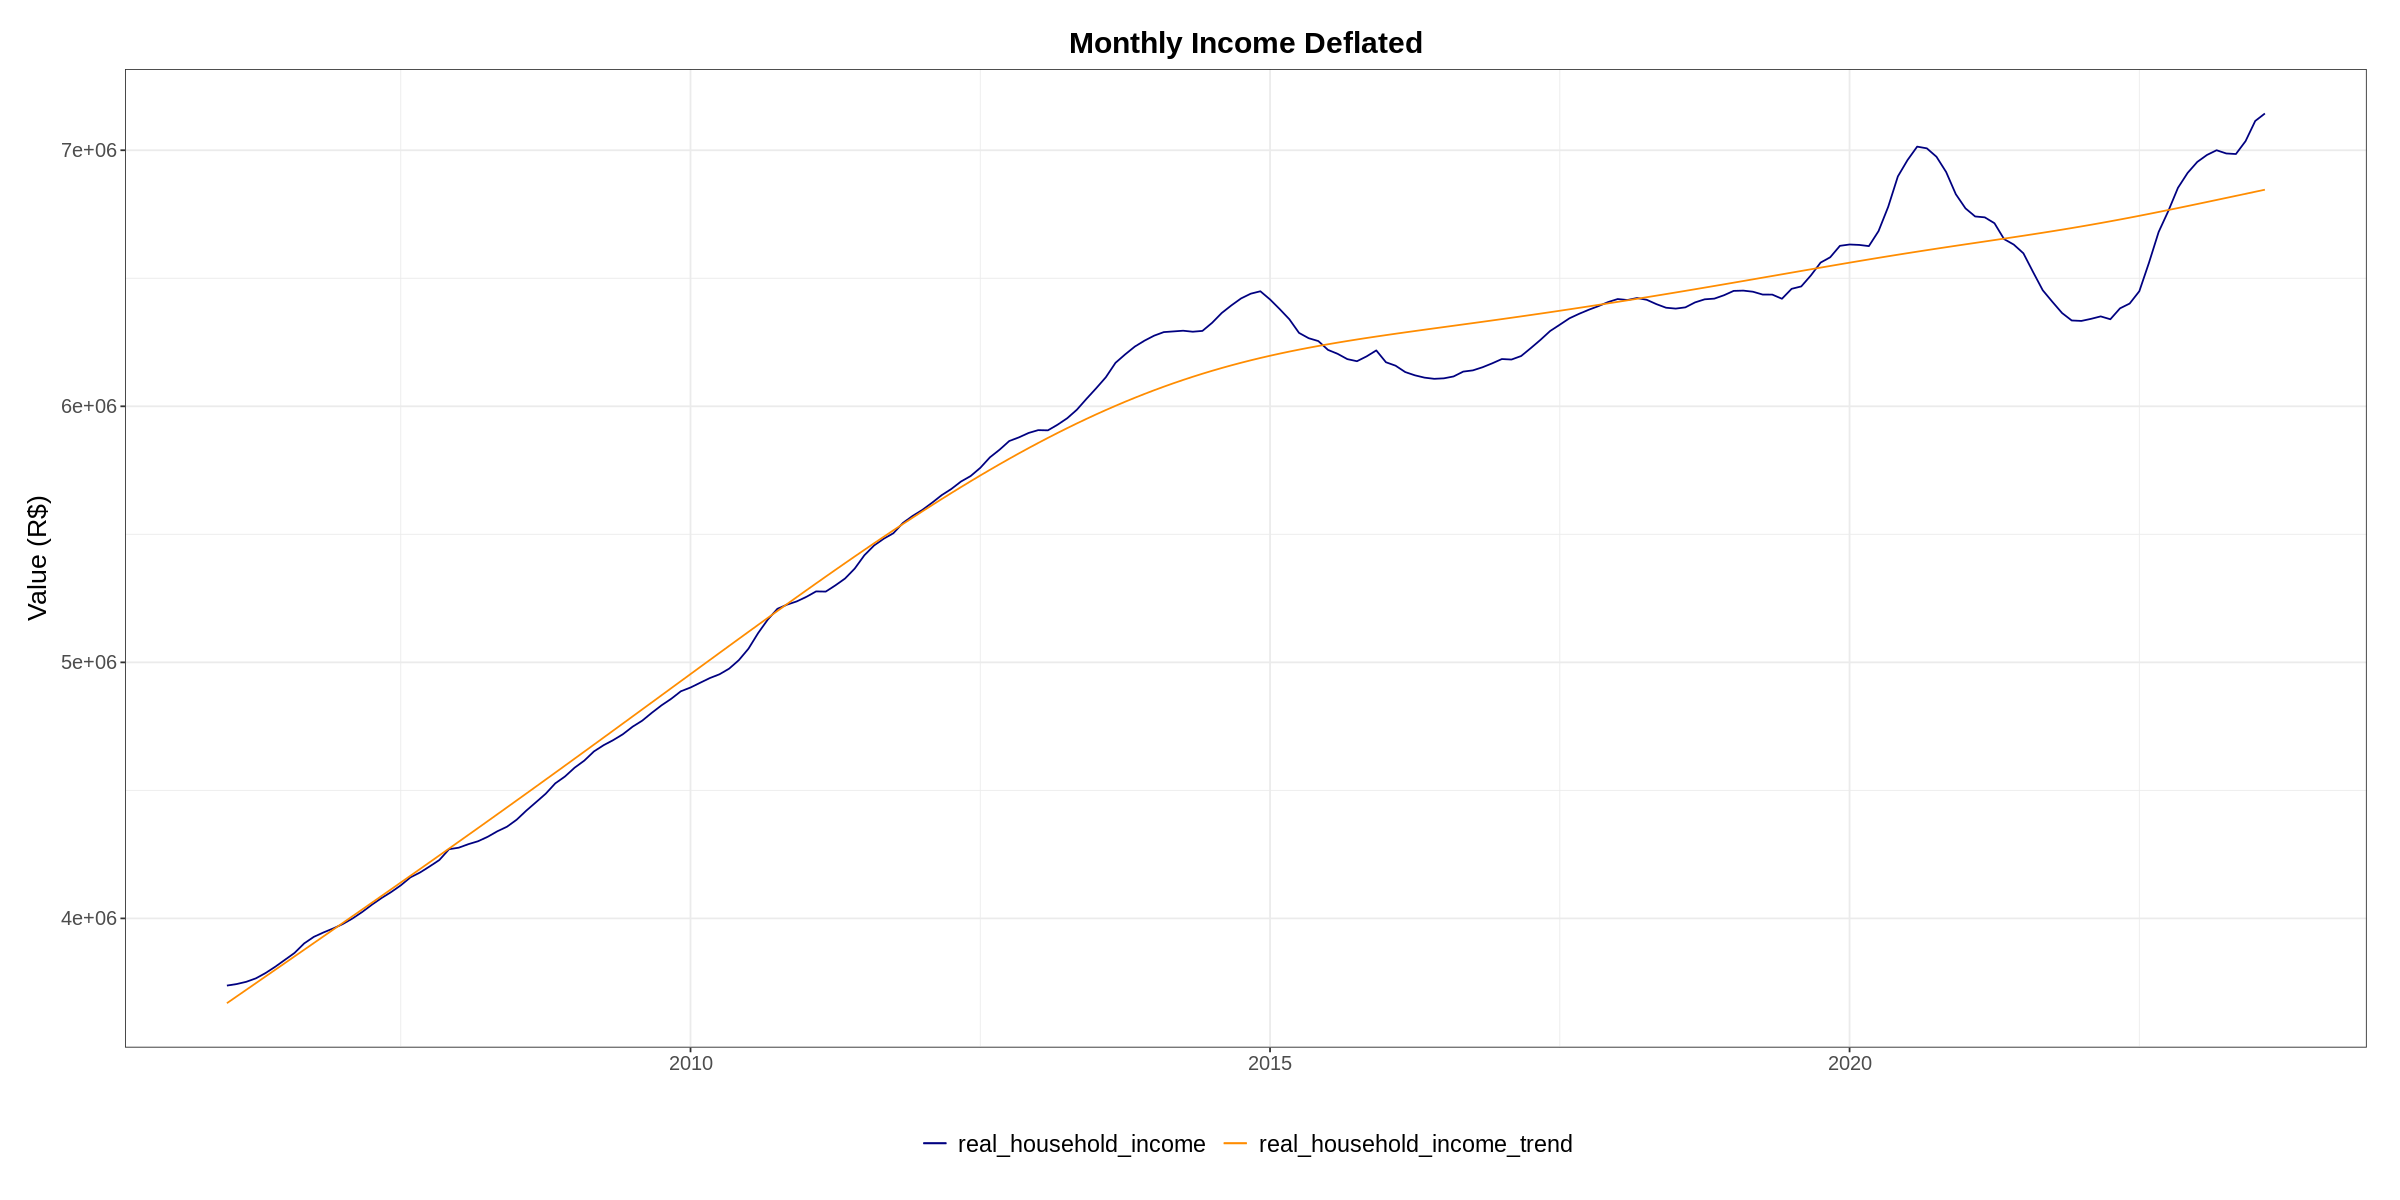

In [ ]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Plotar as séries temporais
ggplot(df_public_data) +
  geom_line(aes(x = month, y = real_household_income, color = "real_household_income")) +
  geom_line(aes(x = month, y = real_household_income_trend, color = "real_household_income_trend")) +
  labs(x = "", y = "Value (R$)", title = "Monthly Income Deflated") +
  scale_color_manual(values = c("navy", "darkorange"), name = "") +
  theme_bw() +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 14),
    legend.title = element_blank(),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 16, vjust = 2),
    axis.title.x = element_text(size = 14),
    plot.caption = element_text(size = 10),
    plot.margin = margin(20, 20, 20, 20)
  )

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


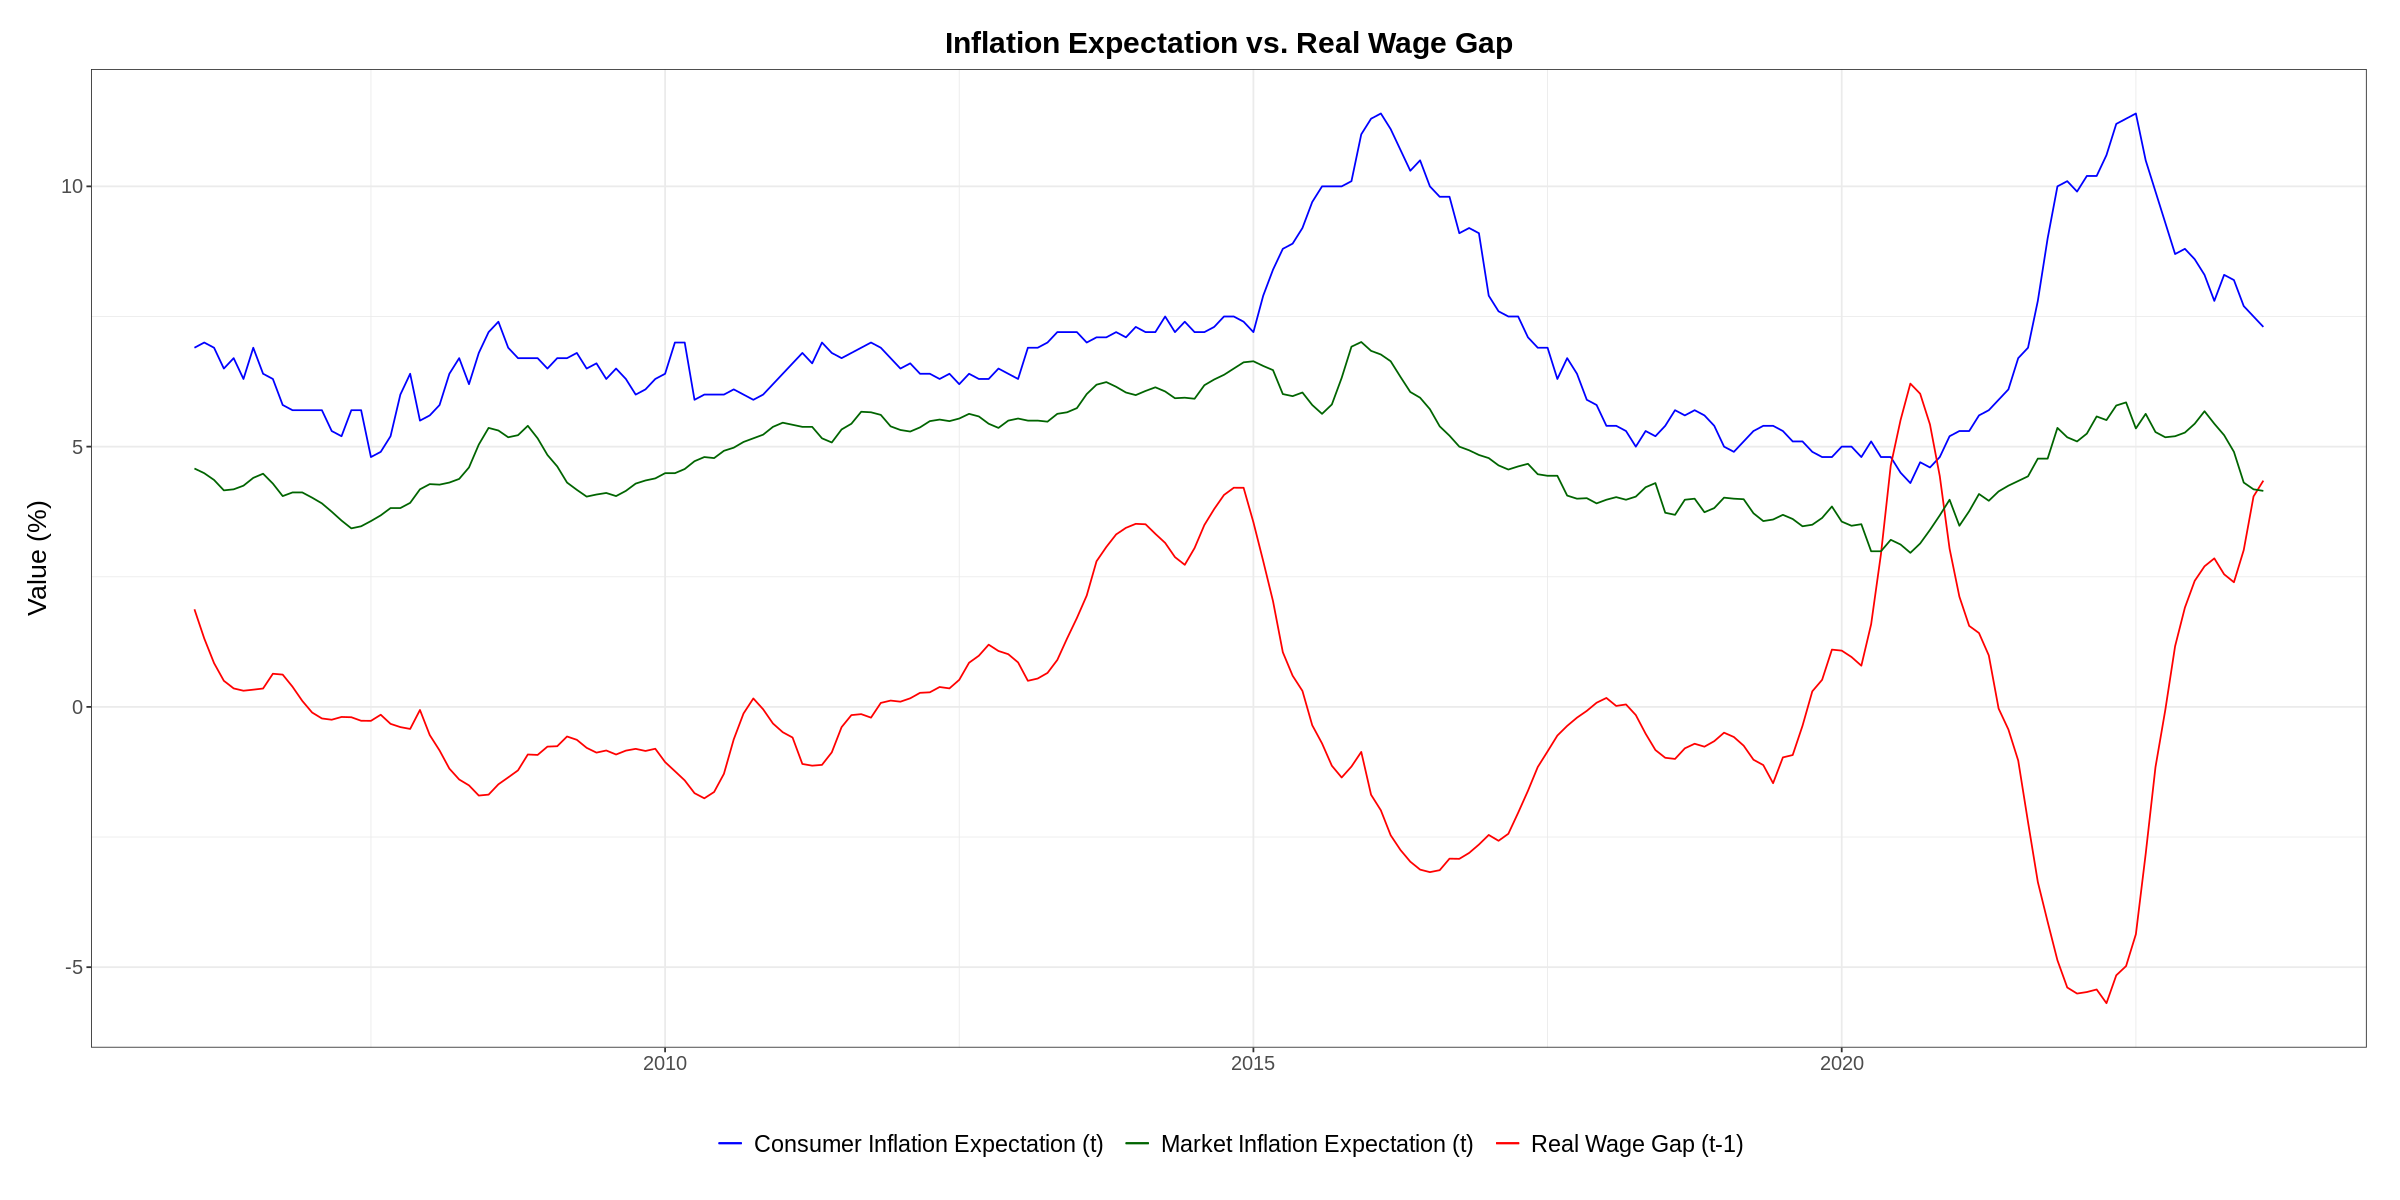

In [ ]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Plotar as séries temporais
ggplot(df_public_data) +
  geom_line(aes(x = month, y = consumer_inflation_expectation, color = "Consumer Inflation Expectation (t)")) +
  geom_line(aes(x = month, y = real_household_income_gap, color = "Real Wage Gap (t-1)")) +
  geom_line(aes(x = month, y = market_inflation_expectation, color = "Market Inflation Expectation (t)")) +
  labs(x = "", y = "Value (%)", title = "Inflation Expectation vs. Real Wage Gap") +
  scale_color_manual(values = c("blue", "darkgreen", "red"), name = "") +
  theme_bw() +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 14),
    legend.title = element_blank(),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 16, vjust = 2),
    axis.title.x = element_text(size = 14),
    plot.caption = element_text(size = 10),
    plot.margin = margin(20, 20, 20, 20)
  )

> #### **Taxa de Câmbio**

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


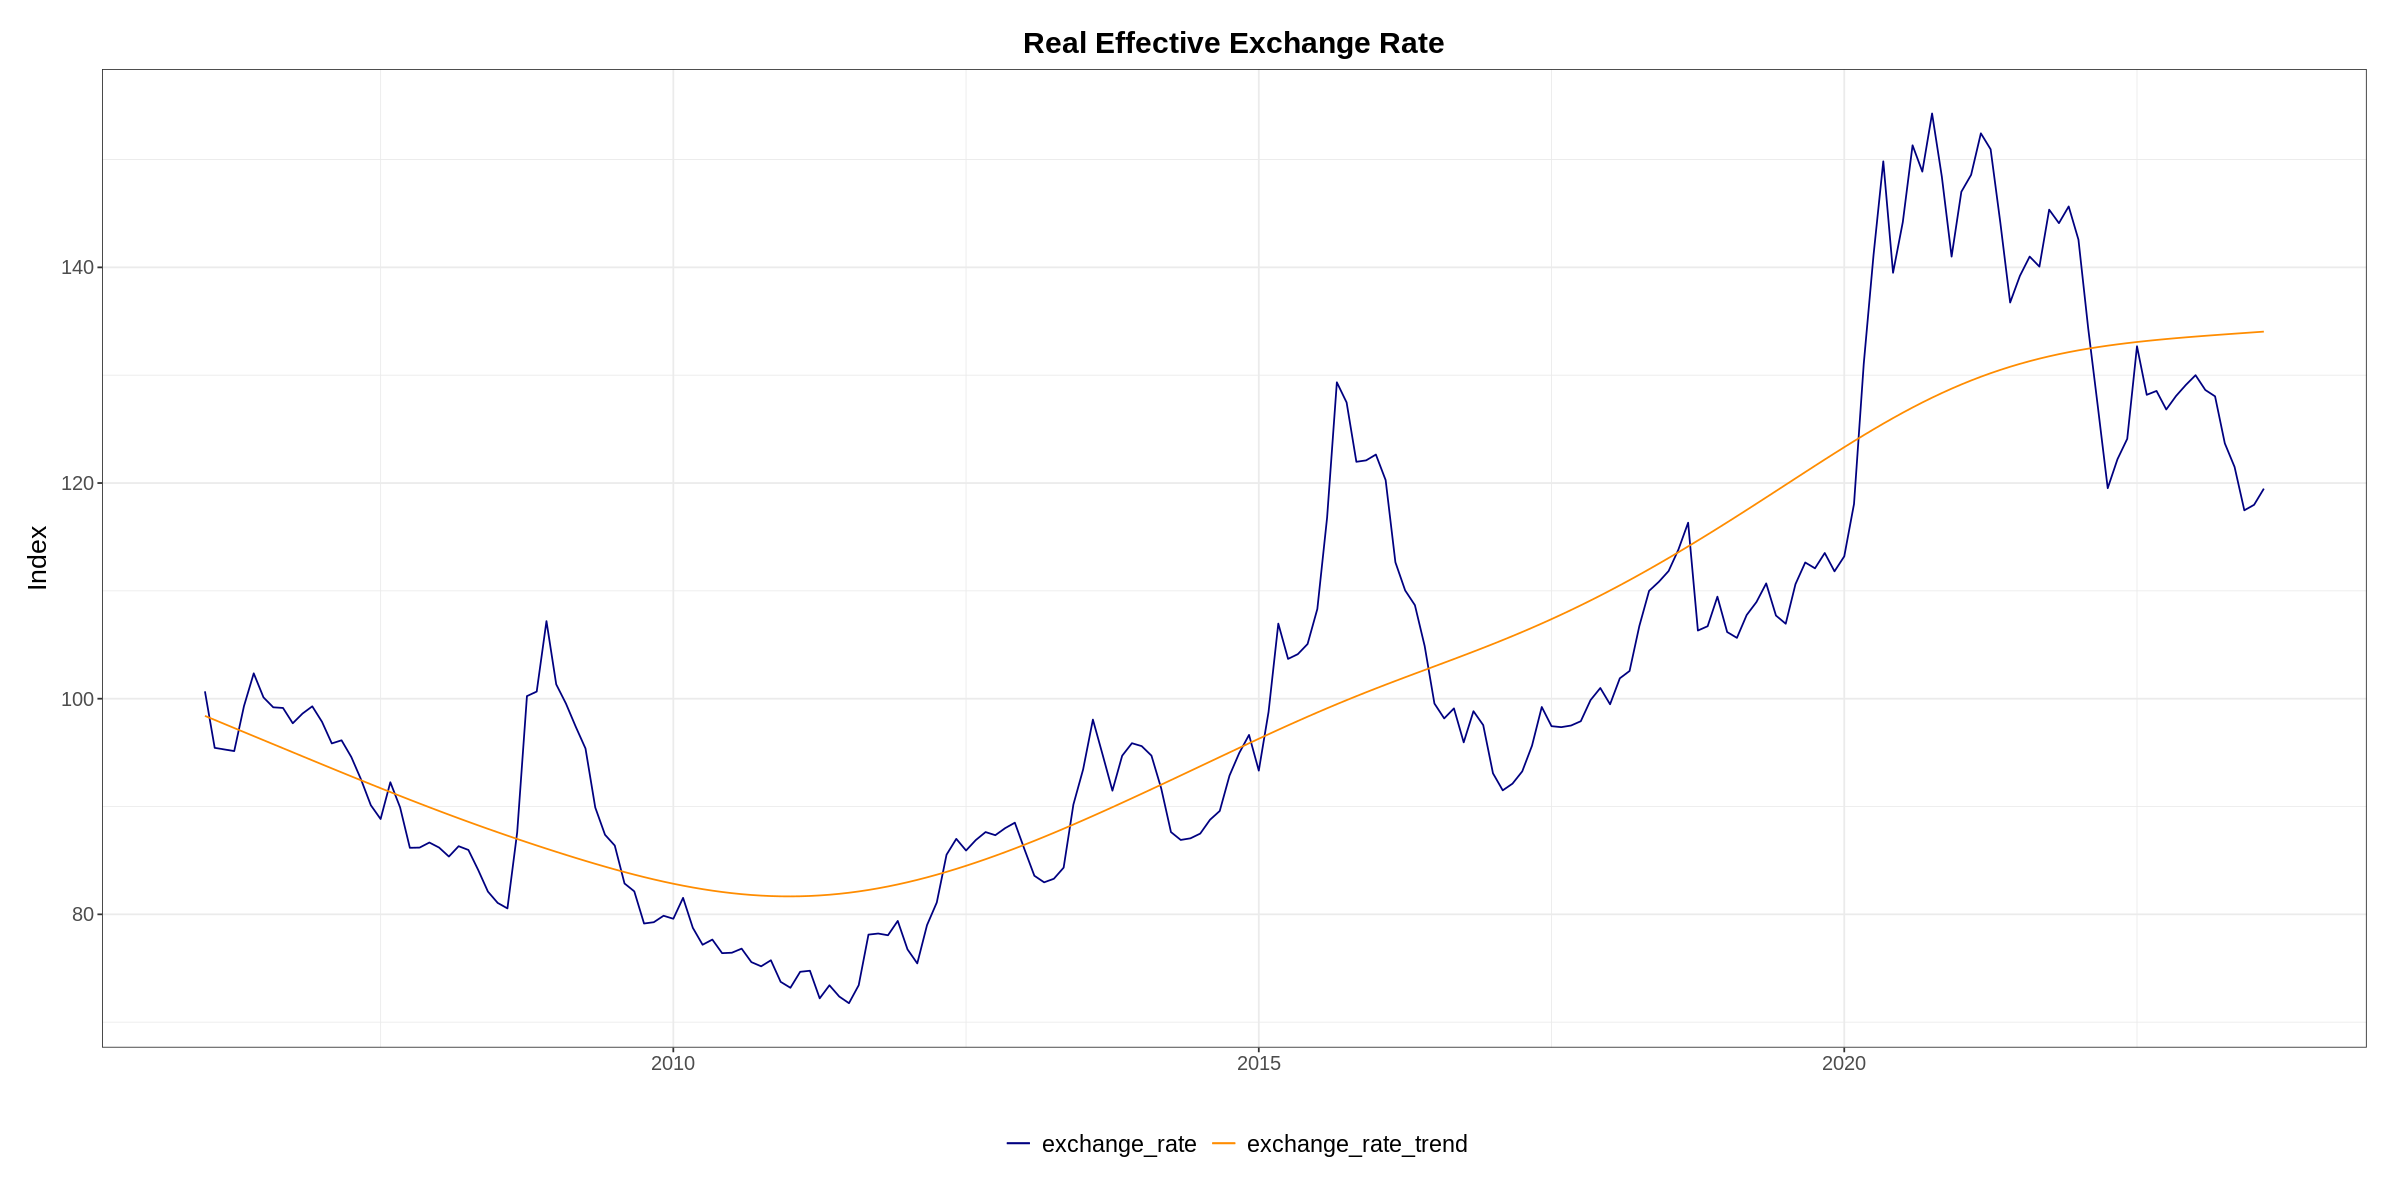

In [ ]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Plotar as séries temporais
ggplot(df_public_data) +
  geom_line(aes(x = month, y = real_exchange_rate, color = "exchange_rate")) +
  geom_line(aes(x = month, y = real_exchange_rate_trend, color = "exchange_rate_trend")) +
  labs(x = "", y = "Index", title = "Real Effective Exchange Rate") +
  scale_color_manual(values = c("navy", "darkorange"), name = "") +
  theme_bw() +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 14),
    legend.title = element_blank(),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 16, vjust = 2),
    axis.title.x = element_text(size = 14),
    plot.caption = element_text(size = 10),
    plot.margin = margin(20, 20, 20, 20)
  )

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


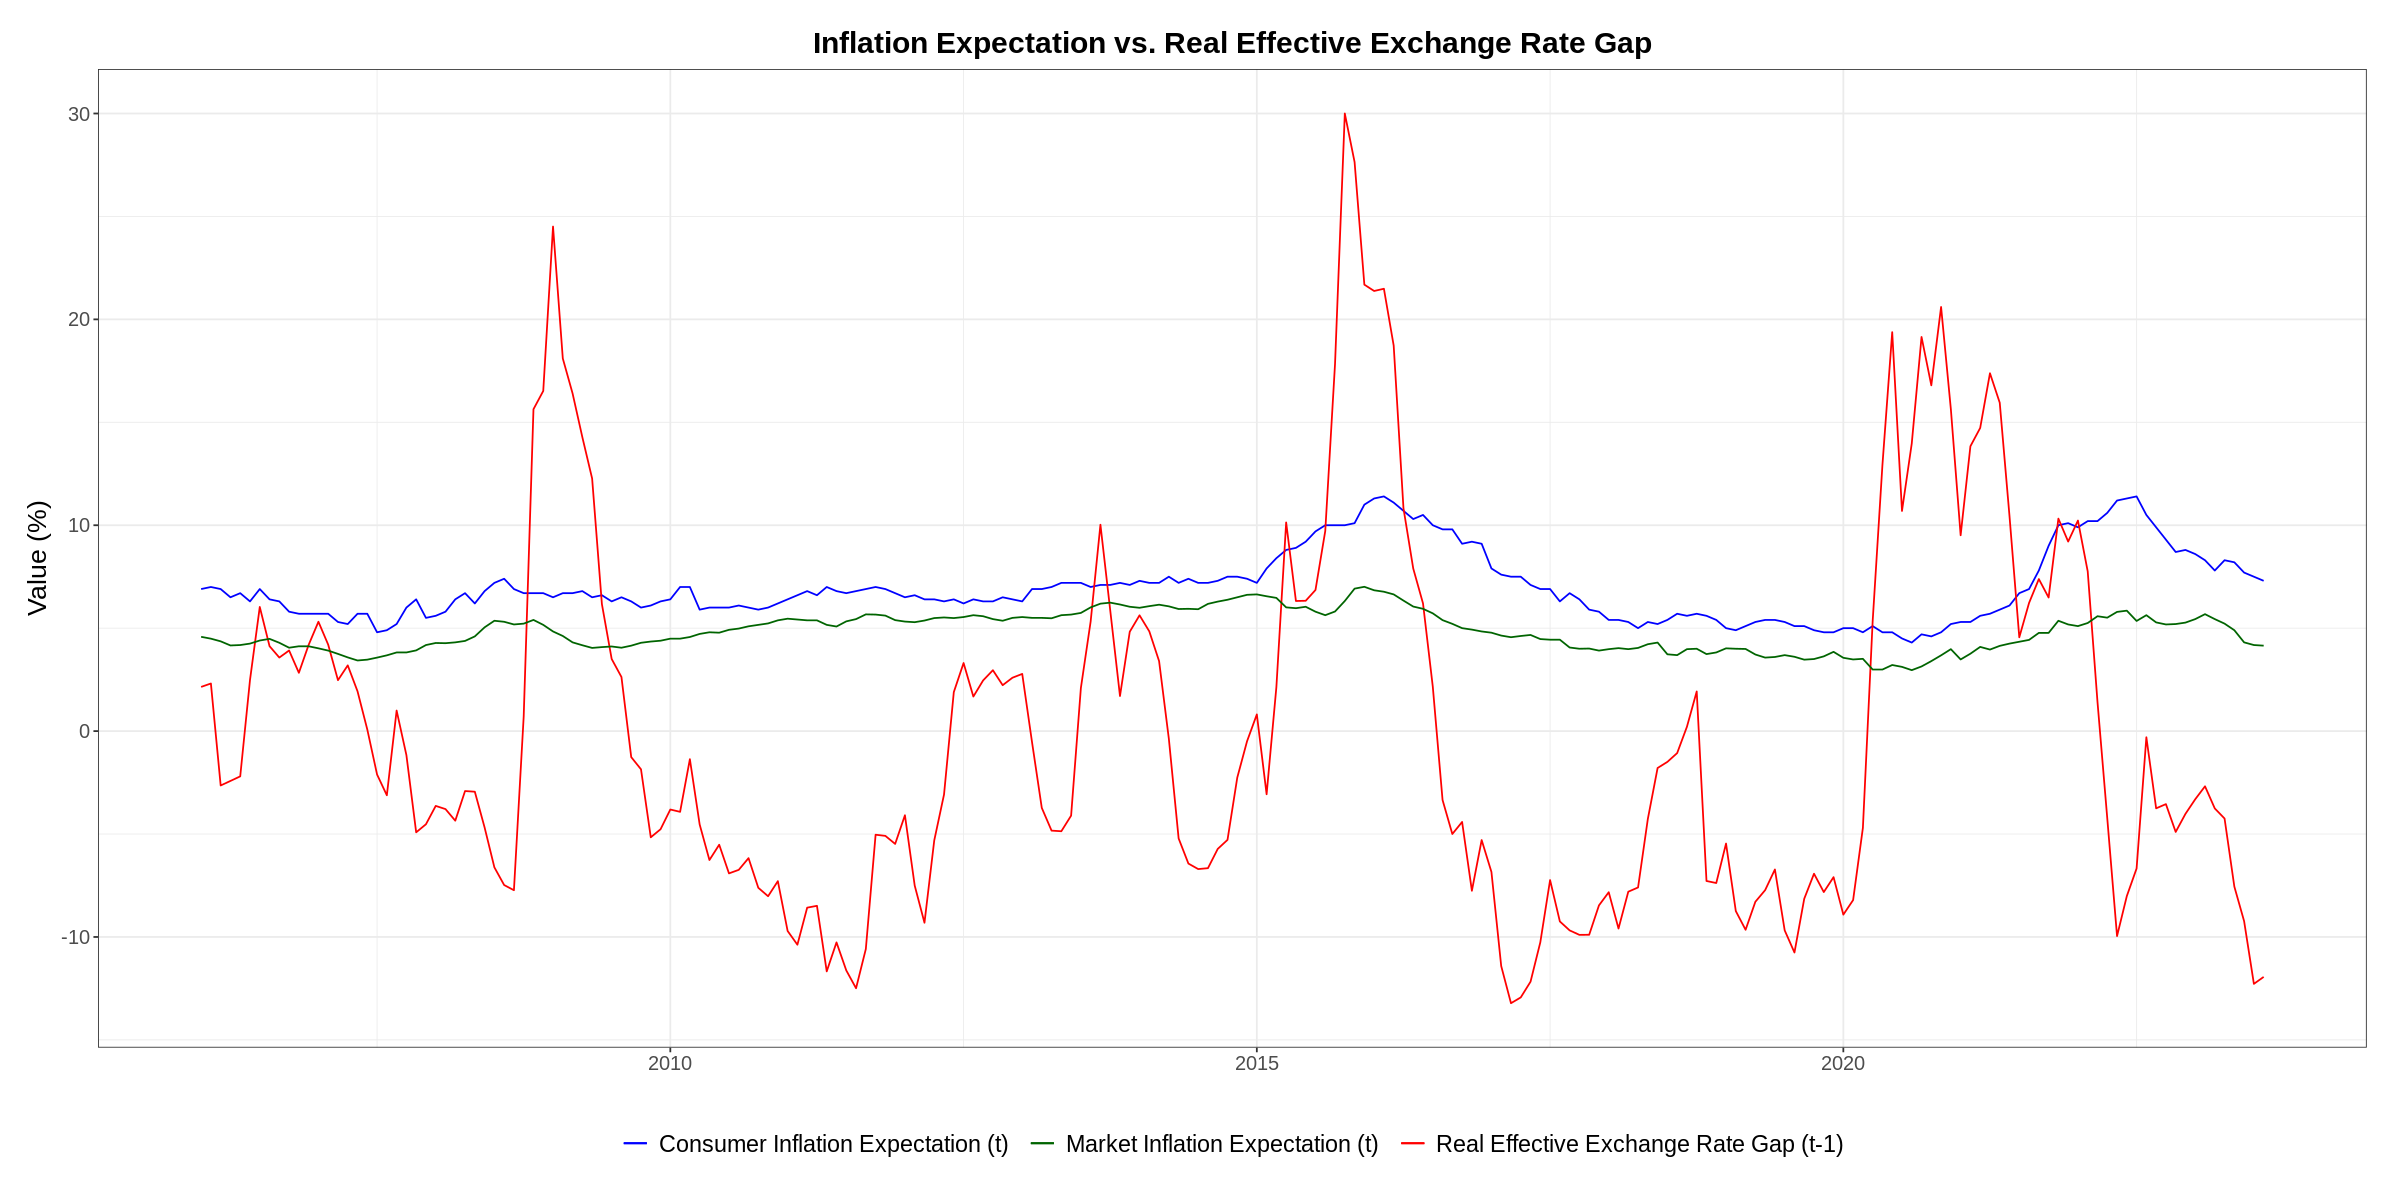

In [ ]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Plotar as séries temporais
ggplot(df_public_data) +
  geom_line(aes(x = month, y = consumer_inflation_expectation, color = "Consumer Inflation Expectation (t)")) +
  geom_line(aes(x = month, y = real_exchange_rate_gap_lag, color = "Real Effective Exchange Rate Gap (t-1)")) +
  geom_line(aes(x = month, y = market_inflation_expectation, color = "Market Inflation Expectation (t)")) +
  labs(x = "", y = "Value (%)", title = "Inflation Expectation vs. Real Effective Exchange Rate Gap") +
  scale_color_manual(values = c("blue", "darkgreen", "red"), name = "") +
  theme_bw() +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 14),
    legend.title = element_blank(),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 16, vjust = 2),
    axis.title.x = element_text(size = 14),
    plot.caption = element_text(size = 10),
    plot.margin = margin(20, 20, 20, 20)
  )

> #### **Resultado Fiscal Primário**

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


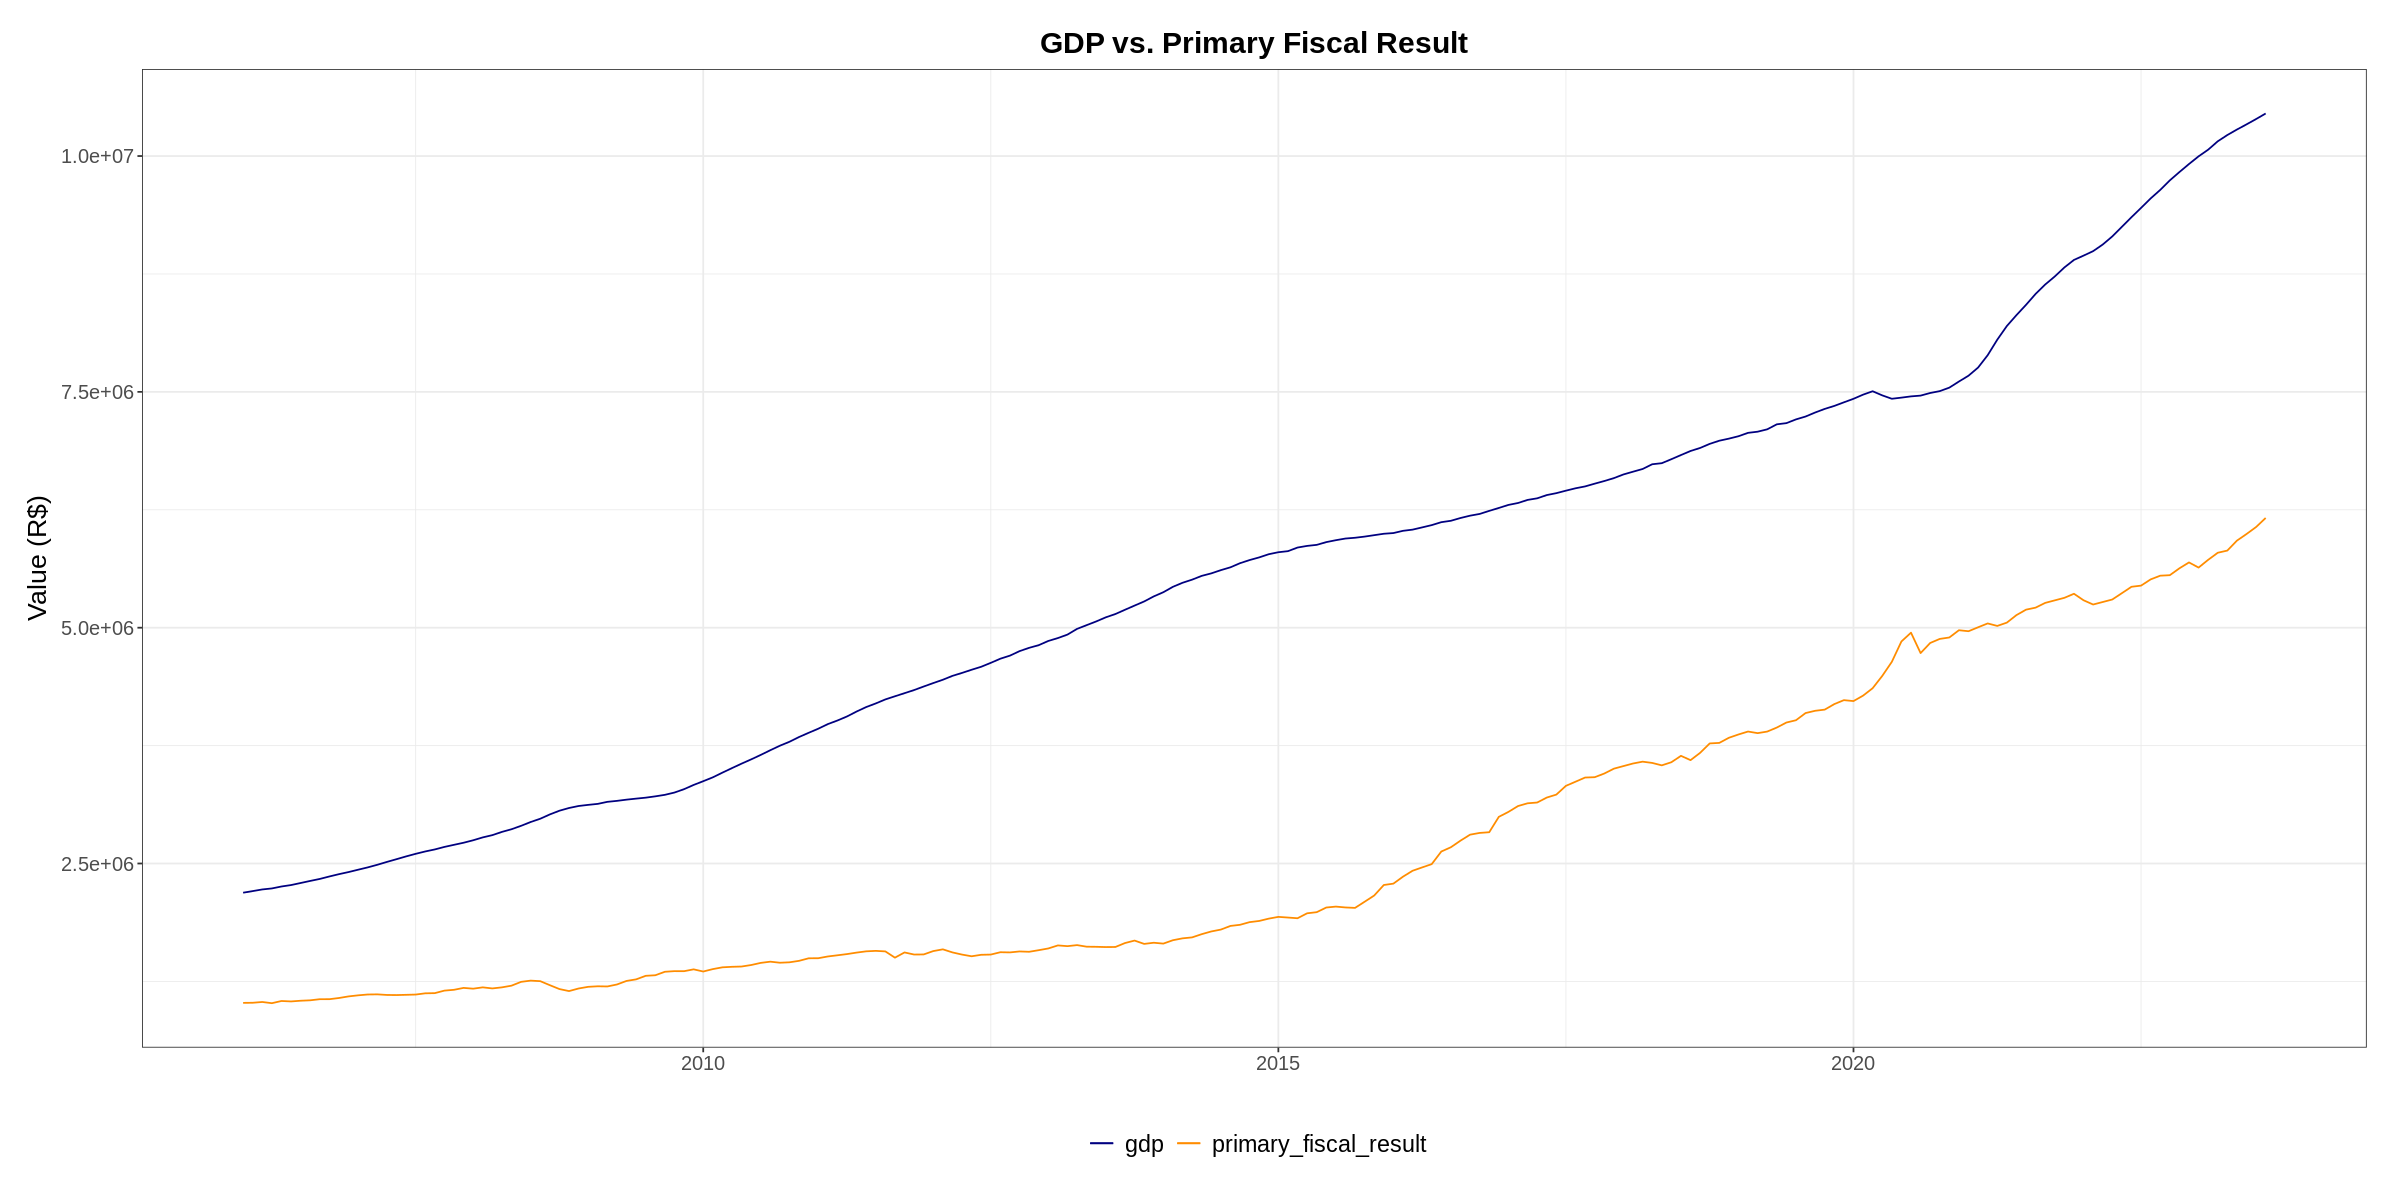

In [ ]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Plotar as séries temporais
ggplot(df_public_data) +
  geom_line(aes(x = month, y = primary_fiscal_result, color = "primary_fiscal_result")) +
  geom_line(aes(x = month, y = gdp, color = "gdp")) +
  labs(x = "", y = "Value (R$)", title = "GDP vs. Primary Fiscal Result") +
  scale_color_manual(values = c("navy", "darkorange"), name = "") +
  theme_bw() +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 14),
    legend.title = element_blank(),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 16, vjust = 2),
    axis.title.x = element_text(size = 14),
    plot.caption = element_text(size = 10),
    plot.margin = margin(20, 20, 20, 20)
  )

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


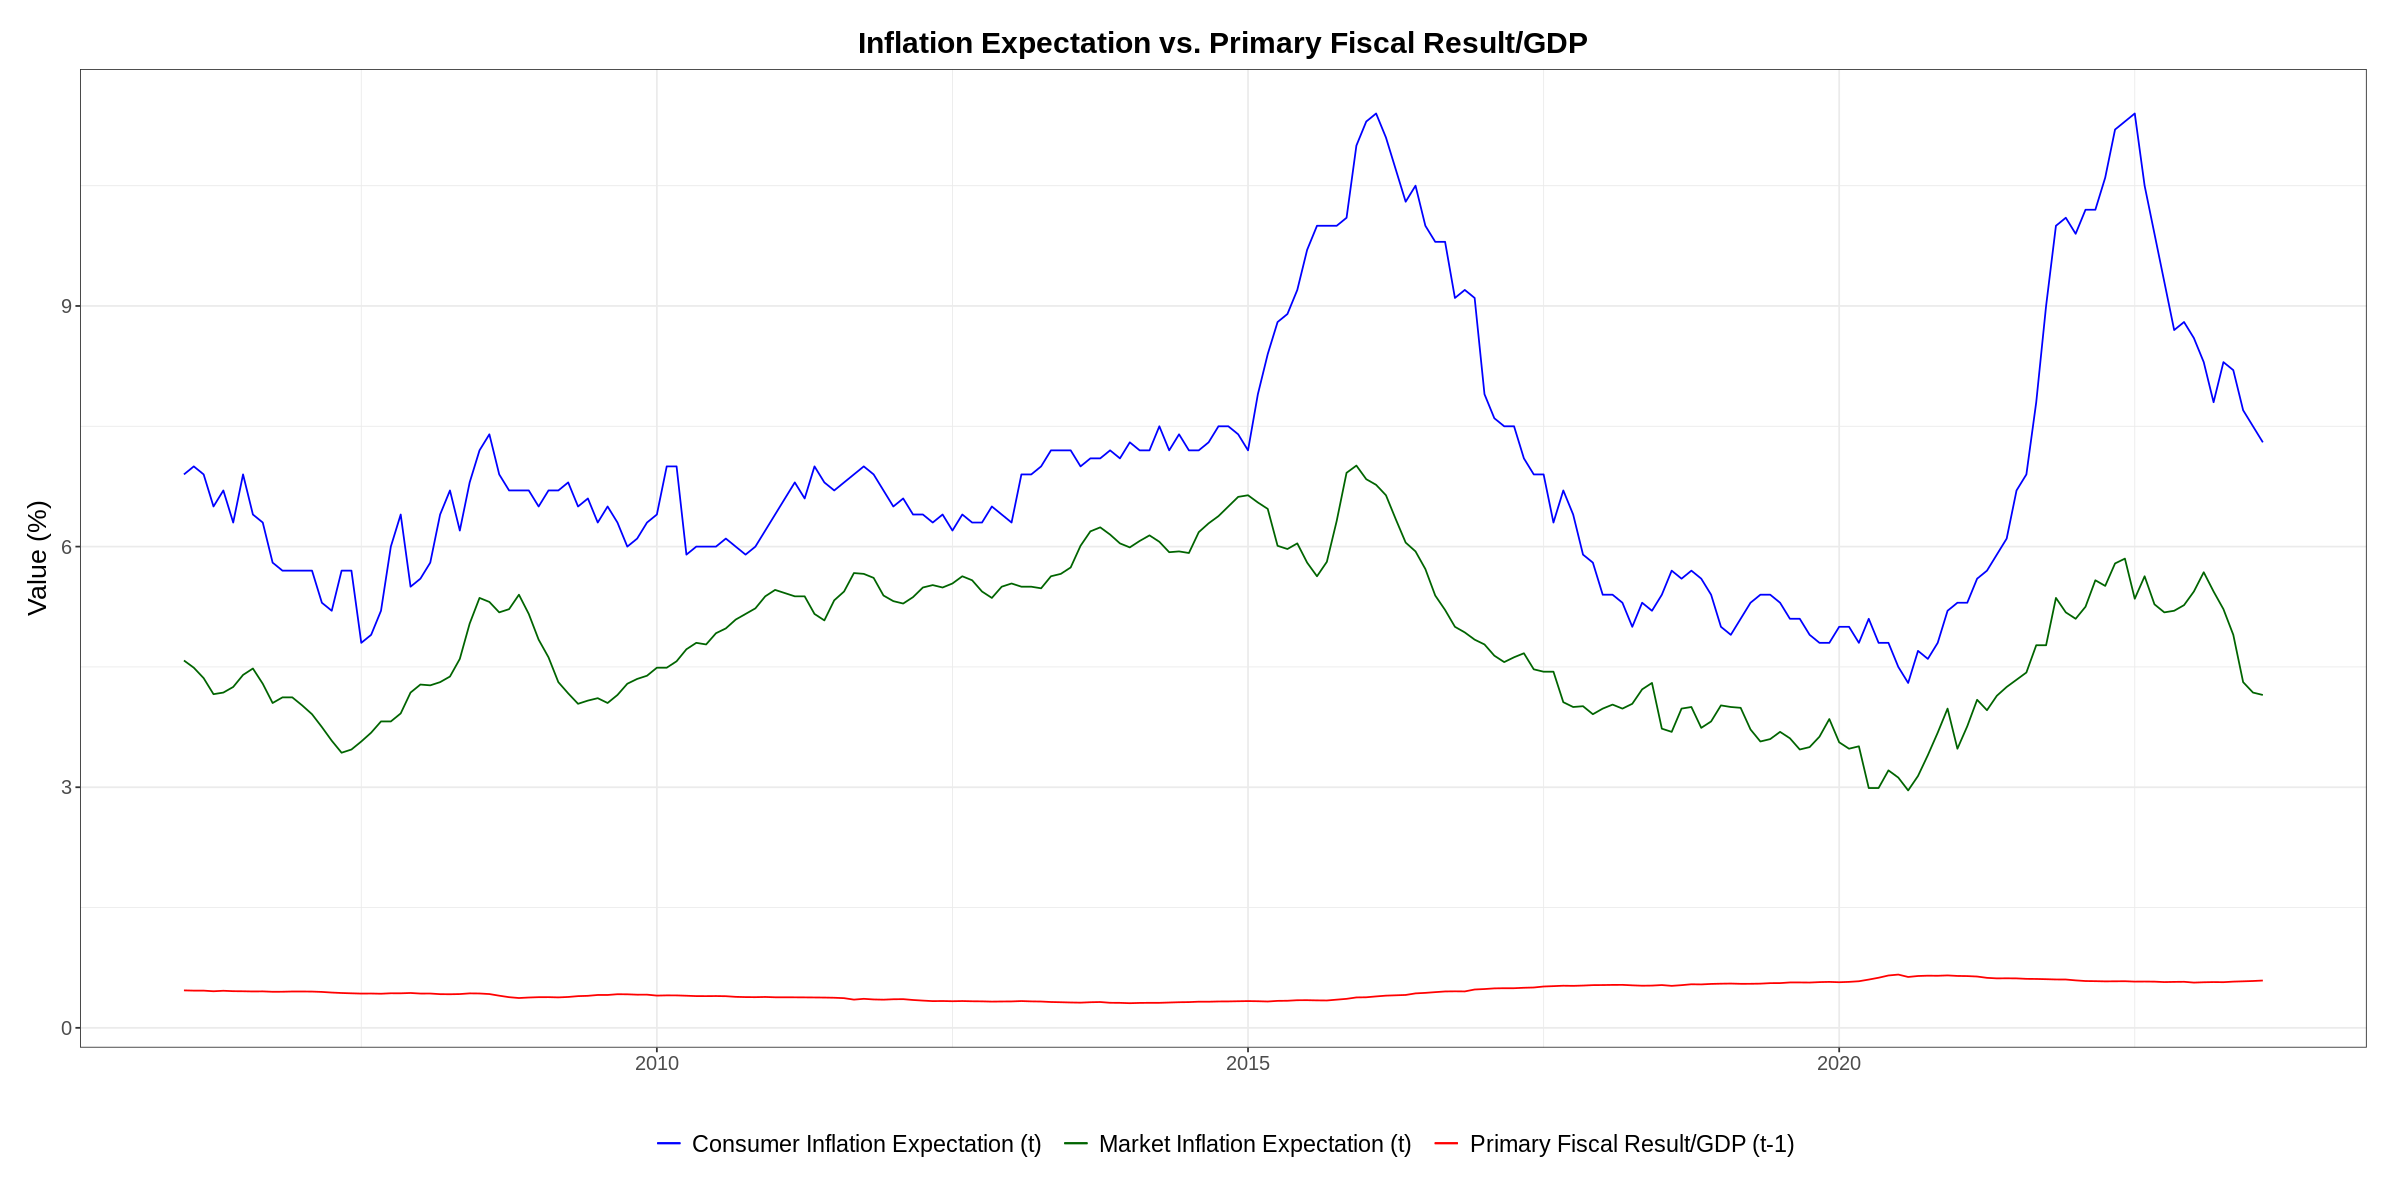

In [ ]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Plotar as séries temporais
ggplot(df_public_data) +

  geom_line(aes(x = month, y = consumer_inflation_expectation, color = "Consumer Inflation Expectation (t)")) +
  geom_line(aes(x = month, y = primary_fiscal_result_to_gdp, color = "Primary Fiscal Result/GDP (t-1)")) +
  geom_line(aes(x = month, y = market_inflation_expectation, color = "Market Inflation Expectation (t)")) +
  labs(x = "", y = "Value (%)", title = "Inflation Expectation vs. Primary Fiscal Result/GDP") +
  scale_color_manual(values = c("blue", "darkgreen", "red"), name = "") +
  theme_bw() +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 14),
    legend.title = element_blank(),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 16, vjust = 2),
    axis.title.x = element_text(size = 14),
    plot.caption = element_text(size = 10),
    plot.margin = margin(20, 20, 20, 20)
  )